In [5]:
# Importing our dataset
import pandas


# Two Ways : API Call or Local Import

# API Call this way our dataset will alwayys be up to date

from urllib.request import urlopen
import json

url = 'https://opendata.muenchen.de/api/3/action/datastore_search?resource_id=40094bd6-f82d-4979-949b-26c8dc00b9a7'  
data_json = json.loads(urlopen(url).read())

dataset_raw = data_json['result']['records']
print(dataset_raw[:3]) # Show 3 first rows

dataset_api = pandas.DataFrame(dataset_raw)
dataset_api = dataset_api.drop('_id', axis = 1) # remove the '_id' column since pandas.DataFrame introduce its own "id" column 

print("\n\n------------Dataset API head :------------\n")
print(dataset_api.head())

# Local Import

path = './dataset/monatszahlen2112_verkehrsunfaelle.csv'
dataset_local = pandas.read_csv(path) 

print("\n\n------------Dataset Local head :------------\n")
print(dataset_local.head())

[{'_id': 1, 'MONATSZAHL': 'Alkoholunfälle', 'AUSPRAEGUNG': 'insgesamt', 'JAHR': 2021, 'MONAT': '202101', 'WERT': None, 'VORJAHRESWERT': 28, 'VERAEND_VORMONAT_PROZENT': None, 'VERAEND_VORJAHRESMONAT_PROZENT': None, 'ZWOELF_MONATE_MITTELWERT': None}, {'_id': 2, 'MONATSZAHL': 'Alkoholunfälle', 'AUSPRAEGUNG': 'insgesamt', 'JAHR': 2021, 'MONAT': '202102', 'WERT': None, 'VORJAHRESWERT': 40, 'VERAEND_VORMONAT_PROZENT': None, 'VERAEND_VORJAHRESMONAT_PROZENT': None, 'ZWOELF_MONATE_MITTELWERT': None}, {'_id': 3, 'MONATSZAHL': 'Alkoholunfälle', 'AUSPRAEGUNG': 'insgesamt', 'JAHR': 2021, 'MONAT': '202103', 'WERT': None, 'VORJAHRESWERT': 27, 'VERAEND_VORMONAT_PROZENT': None, 'VERAEND_VORJAHRESMONAT_PROZENT': None, 'ZWOELF_MONATE_MITTELWERT': None}]


------------Dataset API head :------------

       MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
0  Alkoholunfälle   insgesamt  2021  202101   NaN             28   
1  Alkoholunfälle   insgesamt  2021  202102   NaN             40   
2  Al

In [6]:
# Data Cleaning

# NB : I will work with local_dataset since it's mentioned in the Challenge

dataset = dataset_local.drop(dataset_local.columns[5:], axis=1) # Keep only the first 5 important columns

print(dataset.head())

dataset = dataset.dropna() # Remove all NaN values

print("\n\n------------Removing NaN Values------------\n")
print(dataset.head())

data_sum = dataset[dataset['MONAT'] == 'Summe'] # We might need the Sum information later on so I decided to keep it in data_sum
dataset = dataset[dataset['MONAT'] != 'Summe'] # Remove all the sum from our dataset

print("\n\n------------Sum Data------------\n")
print(data_sum.head())
print("\n\n------------New Dataset------------\n")
print(dataset.head())

# calculate duplicates
dups = dataset.duplicated()
# Checking for duplicates values since rows that have identical data are probably useless,
# If not dangerously misleading during model evaluation.
if dups.any():
    print(dataset[dups])
else:
    print("\nNo duplicates values !")


       MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT
0  Alkoholunfälle   insgesamt  2021  202101   NaN
1  Alkoholunfälle   insgesamt  2021  202102   NaN
2  Alkoholunfälle   insgesamt  2021  202103   NaN
3  Alkoholunfälle   insgesamt  2021  202104   NaN
4  Alkoholunfälle   insgesamt  2021  202105   NaN


------------Removing NaN Values------------

        MONATSZAHL AUSPRAEGUNG  JAHR   MONAT   WERT
12  Alkoholunfälle   insgesamt  2020   Summe  430.0
13  Alkoholunfälle   insgesamt  2020  202001   28.0
14  Alkoholunfälle   insgesamt  2020  202002   40.0
15  Alkoholunfälle   insgesamt  2020  202003   27.0
16  Alkoholunfälle   insgesamt  2020  202004   26.0


------------Sum Data------------

        MONATSZAHL AUSPRAEGUNG  JAHR  MONAT   WERT
12  Alkoholunfälle   insgesamt  2020  Summe  430.0
25  Alkoholunfälle   insgesamt  2019  Summe  434.0
38  Alkoholunfälle   insgesamt  2018  Summe  398.0
51  Alkoholunfälle   insgesamt  2017  Summe  409.0
64  Alkoholunfälle   insgesamt  2016  Summe  301.0

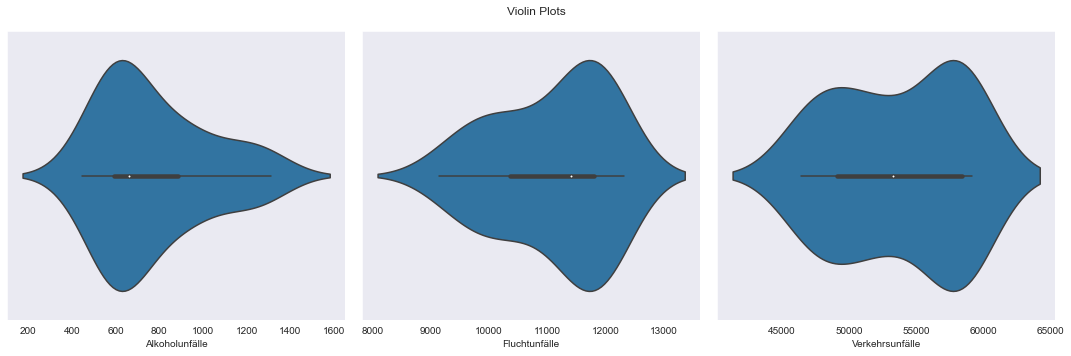

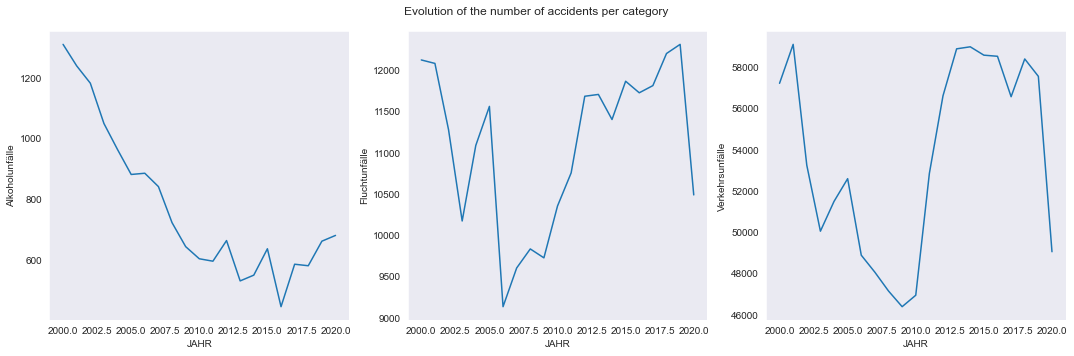

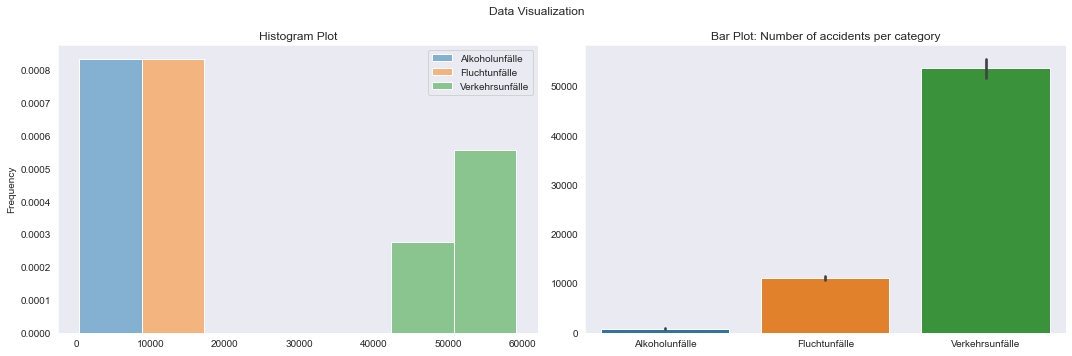

In [7]:
# Data Visualization

import seaborn as sns
from matplotlib import pyplot as plt

# Let's try to visualize the number of accident each year by Category
# For that we will be using our data_sum

plot_data = data_sum.groupby(['JAHR','MONATSZAHL']) # Let's group by Year and Category first
#print(plot_data.head())
#print("\n\n")
plot_data = plot_data.sum() # Let's sum so we remove AUSPRAEGUNG column dependency
#print(plot_data)
#print("\n\n")
plot_data = plot_data.unstack(level = 1) # Let's unstack our data to be able to plot them seperately
#print(plot_data)
#print("\n\n")

plot_data.columns = ['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'] # Renaming our columns

sns.set_style('dark')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Violin Plots')

fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))
fig2.suptitle('Evolution of the number of accidents per category')

for i,col in enumerate(plot_data.columns):
    sns.violinplot(ax=axes[i], x = plot_data[col])
    sns.lineplot(ax=axes2[i], data = plot_data[col])
    
fig.tight_layout()
fig2.tight_layout()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Data Visualization')

# Histogram Plot
sns.histplot(ax=axes[0], data = plot_data, stat = 'frequency')
axes[0].set_title("Histogram Plot");

# Bar Plot
sns.barplot(ax=axes[1], data = plot_data)
axes[1].set_title("Bar Plot: Number of accidents per category");


fig.tight_layout()


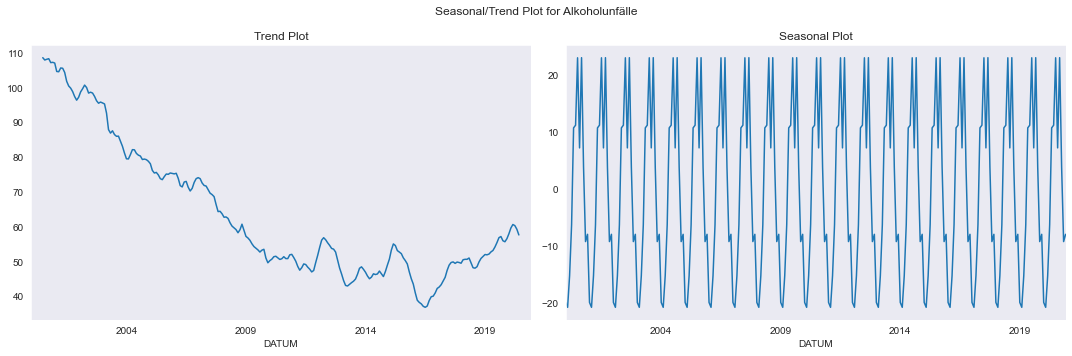

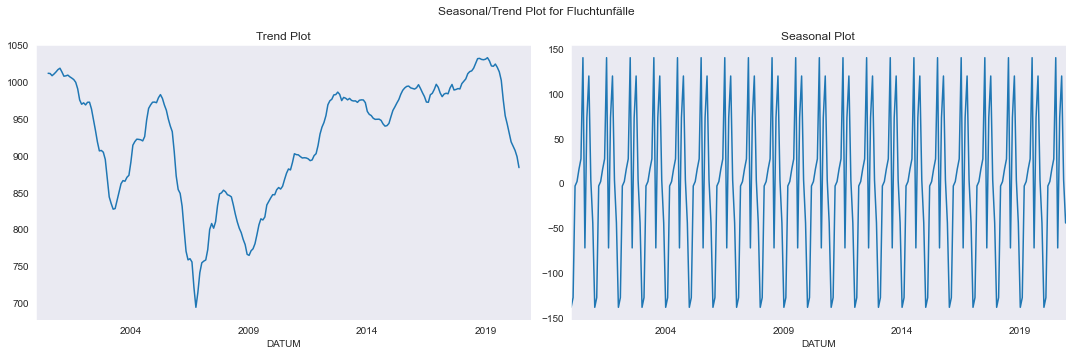

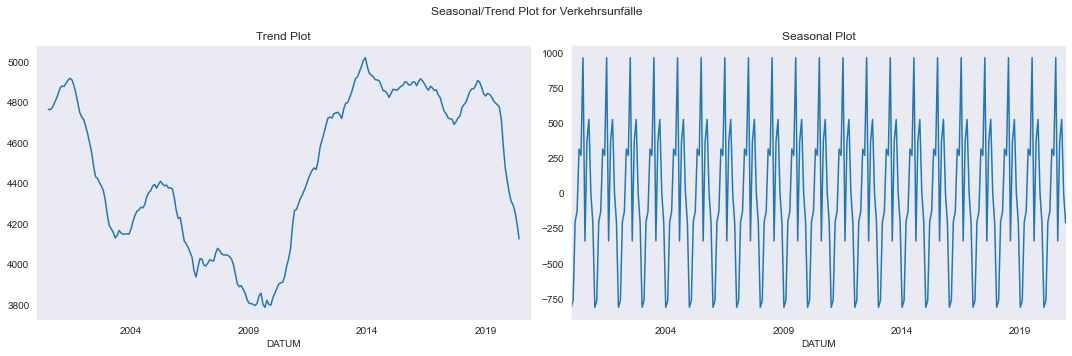

In [8]:
# Data Processing (Extracting Seasonal Trends)

# Extracting Seasonal Trends

# To do that we should start by converting our dates to timestamps in order to use seasonal_decompose
# We will combine Year (JAHR) and Months (MONAT) columns into a single column that we will call Date (DATUM)
from statsmodels.tsa.seasonal import seasonal_decompose

# Since we are missing the day I'll suppose that it's 1st of each Month
# Since MONAT has the year info we will use that MONAT[-2:] = Months and MONAT[:-2] = Year

dataset['DATUM'] = dataset['MONAT'].apply(lambda m:  pandas.to_datetime(m[:-2] + '-' + m[-2:] + '-01'))
dataset = dataset.drop(['MONAT', 'JAHR'], axis = 1) # We remove MONAT and JAHR since the info exists in our new column DATUM
dataset = dataset.groupby(['DATUM','MONATSZAHL']).sum().unstack(level = 1)
dataset.sort_values(by='DATUM',inplace = True)
MONATSZAHL = ['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle']
dataset.columns = MONATSZAHL

for cat in MONATSZAHL:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Seasonal/Trend Plot for ' + cat)
    analysis = dataset[cat]
    decompose_result_mult = seasonal_decompose(analysis, model="additive")
    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    trend.plot(ax = axes[0]);
    axes[0].set_title("Trend Plot");
    seasonal.plot(ax = axes[1]);
    axes[1].set_title("Seasonal Plot");
    plt.tight_layout()

# It's clear that Alkoholunfälle present a decreasing trend over the years while it doesn't seem the case for the other two
# Just to be sure let's run a Stationarity Check on our data

In [9]:
# Checking for Stationarity
# Two common methods : Visualization and the Augmented Dickey-Fuller (ADF) Test
# We will be using the ADF Test since our time span is large (20 years)

# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries, autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

for cat in MONATSZAHL:
    analysis = dataset[cat]
    ADF_test(analysis, cat)

# As we suspected Alkoholunfälle is not stationary while both Fluchtunfälle and Verkehrsunfälle aren't either
# So for building our model we sould be using a model that takes data with trends as input


########################################################################################################
# Another option
# Detrend by Model Fitting (most effective in our case since we have a discrete distribution of values)
########################################################################################################



 > Is the Alkoholunfälle stationary ?
Test statistic = -2.511
P-value = 0.113
Critical values :
	1%: -3.458128284586202 - The data is not stationary with 99% confidence
	5%: -2.873761835239286 - The data is not stationary with 95% confidence
	10%: -2.5732834559706235 - The data is not stationary with 90% confidence
 > Is the Fluchtunfälle stationary ?
Test statistic = -2.772
P-value = 0.062
Critical values :
	1%: -3.4584868856997004 - The data is not stationary with 99% confidence
	5%: -2.873918902362675 - The data is not stationary with 95% confidence
	10%: -2.573367247623359 - The data is  stationary with 90% confidence
 > Is the Verkehrsunfälle stationary ?
Test statistic = -1.888
P-value = 0.338
Critical values :
	1%: -3.4584868856997004 - The data is not stationary with 99% confidence
	5%: -2.873918902362675 - The data is not stationary with 95% confidence
	10%: -2.573367247623359 - The data is not stationary with 90% confidence


In [14]:
# Model - Building
# We should consider at least 4 forecasting models

# Simple Exponential Smoothing (SES) for data without trend or seasonality
# Holt’s Linear Trend Method for data with a trend but no seasonality
# Holt-Winters’ Seasonal Method for data with trend and/or seasonality
# SARIMA for data with trend and/or seasonality

# We choose SARIMA since it's the most robust of the 4 forecasting models (no need for detrending)

# SARIMA includes several parameters that can be tuned to achieve optimal performance
# p/P(Trend/Seasonal autoregression order), d/D(Trend/Seasonal difference order), q/Q(Trend/Seasonal moving average order)
# One way to tune thoses parameters is by using a search grid ( Warnings ! : Takes too much time)
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning,ConvergenceWarning
import numpy

warnings.simplefilter('ignore', ValueWarning) # Ignoring Warnings
warnings.simplefilter('ignore', ConvergenceWarning) # Ignoring Warnings

def sarima_grid_search(y,seasonal_period, nb_iter):
    p = d = q = range(0, 5)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    param_mini = None
    param_seasonal_mini = None
    mini = None
    mini = float('+inf')
    i = 0
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = SARIMAX(y,
                                order=param,
                                seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

                results = mod.fit()
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal
                    print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                    if (i >= nb_iter):
                        i = 0
                        break
                    i += 1
            except KeyboardInterrupt:
                    break
            else:
                continue
        else:
            # Continue if the inner loop wasn't broken.
            continue
        # Inner loop was broken, break the outer.
        break
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))
    return (param_mini, param_seasonal_mini)

orders = numpy.zeros([3,3])
seasonal_orders = numpy.zeros([3,4])
for i,cat in enumerate(MONATSZAHL):
    print("Search Grid for " + cat)
    analysis = dataset[cat]
    orders[i,:],seasonal_orders[i,:] = sarima_grid_search(analysis, 12, 7) # Step 12 , nb_iter = 7

Search Grid for Alkoholunfälle
SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2845.9023932885625
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2468.563472006248
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:2242.880209546842
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:2018.6370165591934
SARIMA(0, 0, 0)x(0, 0, 4, 12) - AIC:1884.843731094437
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:1788.890702712353
SARIMA(0, 0, 0)x(0, 1, 3, 12) - AIC:1658.214988286669
SARIMA(0, 0, 0)x(0, 1, 4, 12) - AIC:1560.8753622446668
The set of parameters with the minimum AIC is: SARIMA(0, 0, 0)x(0, 1, 4, 12) - AIC:1560.8753622446668
Search Grid for Fluchtunfälle
SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4148.675612144627
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3685.6337828315295
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:3353.90006294395
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:3059.67007411914
SARIMA(0, 0, 0)x(0, 0, 4, 12) - AIC:2844.292979461696
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:2695.9663034942223
SARIMA(0, 0, 0)x(0, 1, 3, 12) - AIC:2535.6867046102752
SARIMA(0, 0, 0)x(0, 1, 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.5502      0.079     -6.976      0.000      -0.705      -0.396
ma.S.L24       0.0737      0.085      0.866      0.387      -0.093       0.240
ma.S.L36       0.1601      0.089      1.806      0.071      -0.014       0.334
ma.S.L48       0.0792      0.077      1.035      0.301      -0.071       0.229
sigma2       193.8561     21.862      8.867      0.000     151.007     236.706


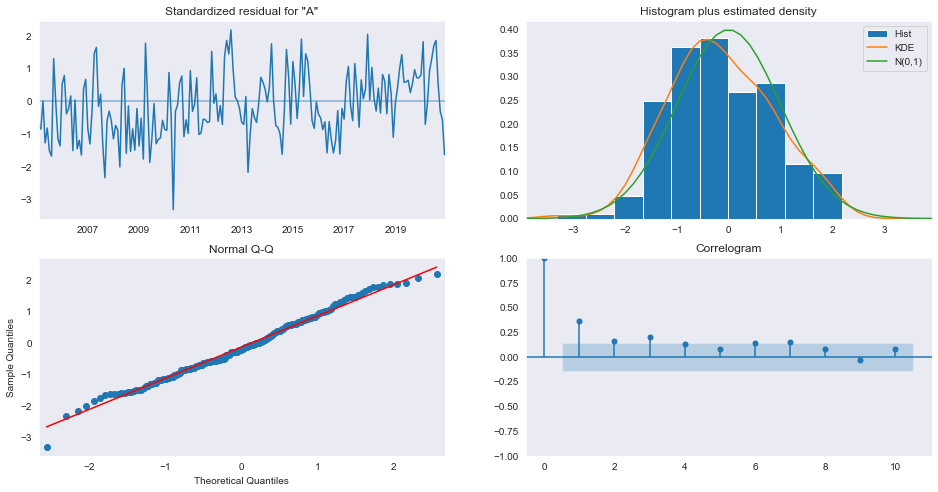

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 12.05


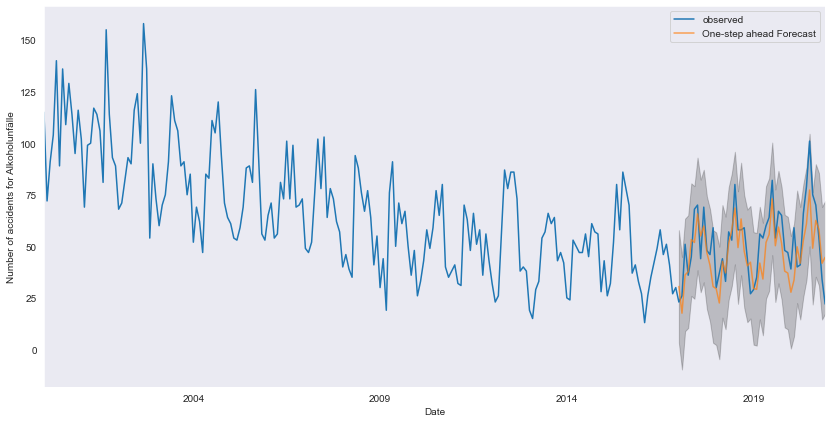

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 14.71


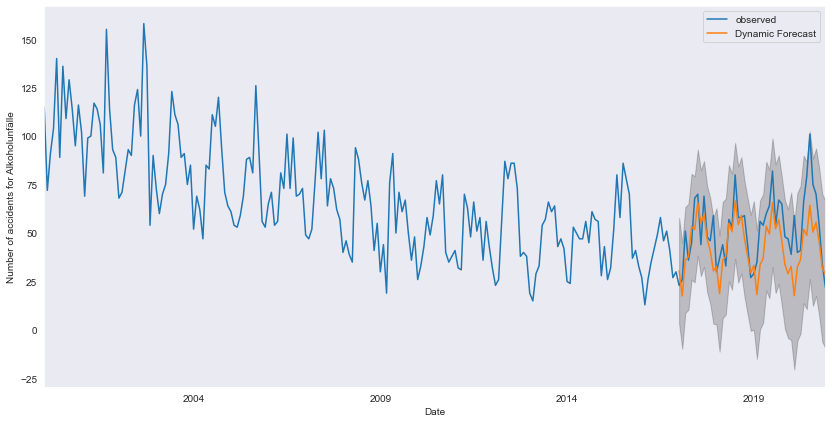

------------------------------------------------------------------------------------------------------------


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.0437      0.261     -3.999      0.000      -1.555      -0.532
ma.S.L24      -0.1397      0.113     -1.235      0.217      -0.361       0.082
ma.S.L36       0.0681      0.099      0.690      0.490      -0.125       0.261
ma.S.L48      -0.1862      0.113     -1.644      0.100      -0.408       0.036
sigma2      1.022e+04   2520.652      4.053      0.000    5276.187    1.52e+04


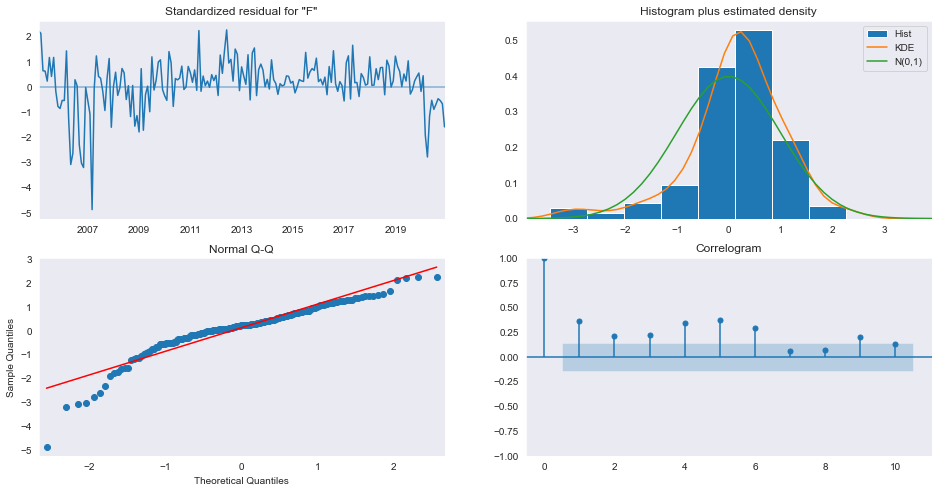

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 89.85


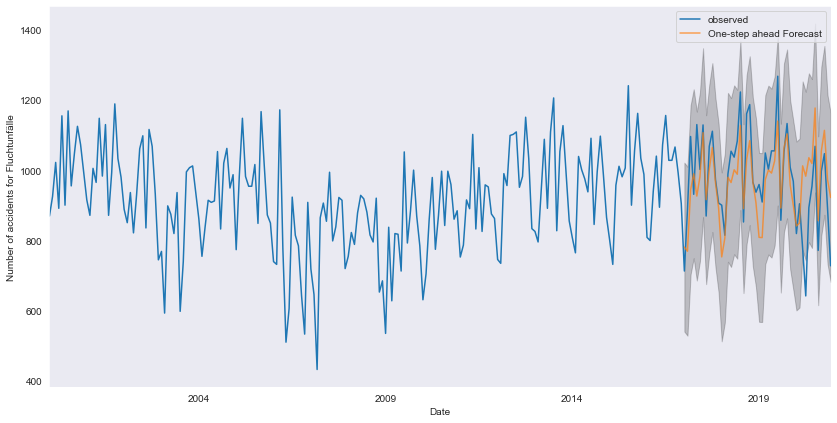

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 106.31


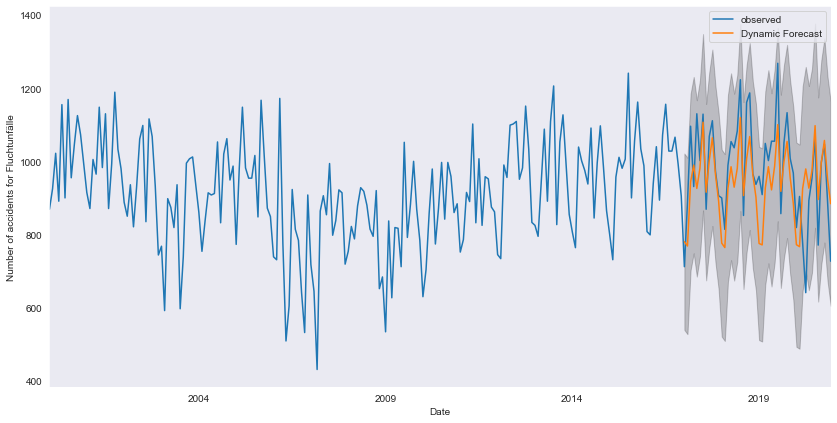

------------------------------------------------------------------------------------------------------------


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.4036      0.084     -4.813      0.000      -0.568      -0.239
ma.S.L24      -0.1108      0.103     -1.080      0.280      -0.312       0.090
ma.S.L36       0.0407      0.090      0.451      0.652      -0.136       0.218
ma.S.L48      -0.2027      0.091     -2.230      0.026      -0.381      -0.025
sigma2      2.013e+05   1.85e+04     10.882      0.000    1.65e+05    2.38e+05


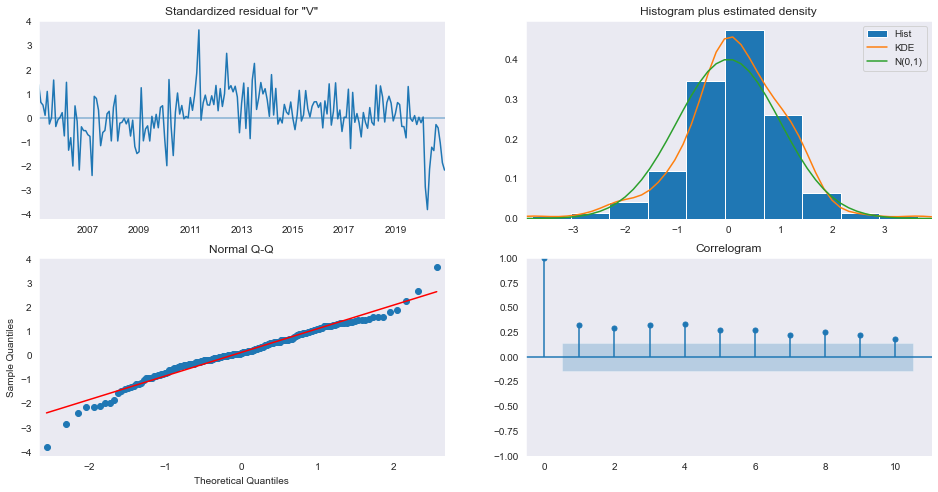

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 293.57


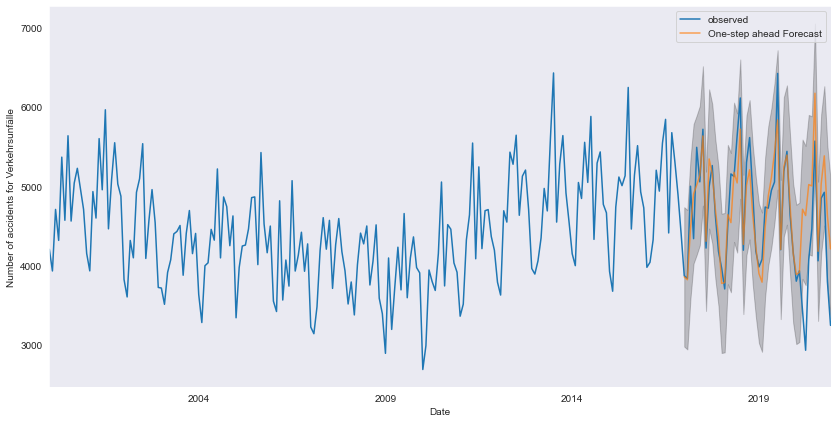

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 461.51


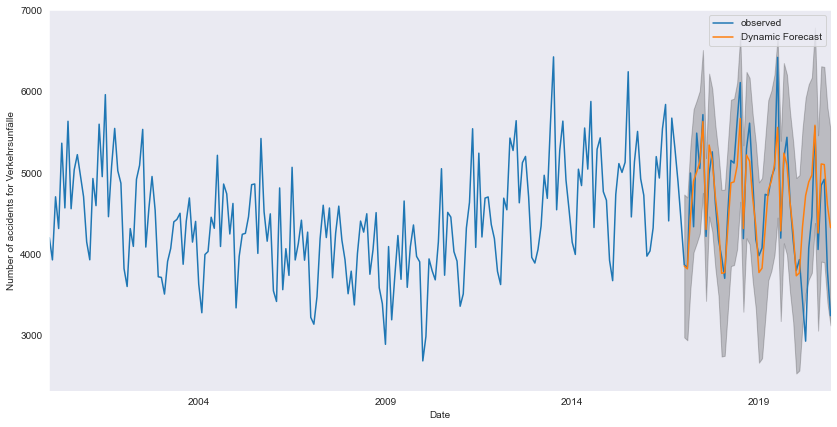

------------------------------------------------------------------------------------------------------------




In [15]:
# Best set of parameters for SARIMA:
# orders = [[0,0,0] ,[0,0,0], [0,0,0]]
# seasonal_orders = [[0, 1, 4], [0, 1, 4], [0, 1, 4]]

def sarima_eva(y,order,seasonal_order,pred_date,y_to_test,cat, seasonal_period = 12):
    # fit the model 
    mod = SARIMAX(y,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pandas.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    #print(y_forecasted)
    #print(y_to_test.loc[pred_date])
    mse = ((y_forecasted - y_to_test.loc[pred_date]) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(numpy.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    #print(pred_ci.iloc[:,0][0])
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:,0],
                    pred_ci.iloc[:,1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Number of accidents for ' + cat)
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pandas.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(numpy.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Number of accidents for ' + cat)

    plt.legend()
    plt.show()
    
    return (results)

# Now let's split our dataset to dataset_train (80%) and dataset_val (20%)
dataset_train = dataset[:'2017'] # 17 years for training
dataset_val = dataset['2017':] # last 4 years for testing

# Training + Testing
models = []
for i,cat in enumerate(MONATSZAHL):
    analysis_val = dataset_val[cat]
    analysis = dataset[cat]
    models.append(sarima_eva(analysis,orders[i],seasonal_orders[i],'2017',analysis_val, cat)) # Using full dataset_val
    models[i].save("./models/model_" + cat + ".pkg") # Saving models format pkg
    print("------------------------------------------------------------------------------------------------------------\n\n")


Prediction for Alkoholunfälle


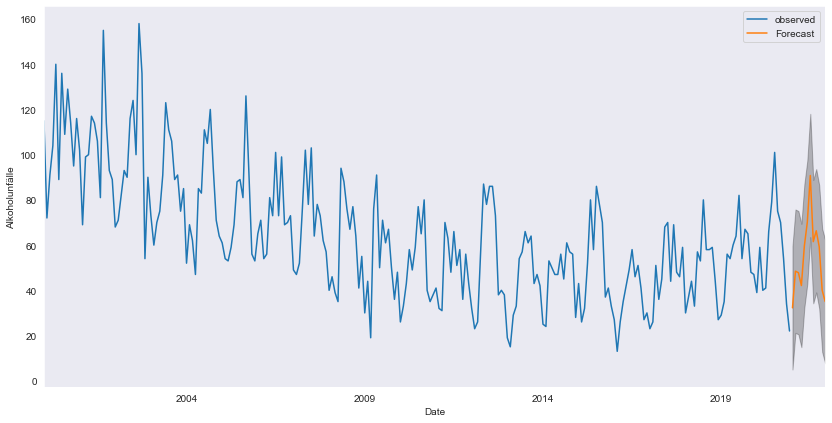

35.03641895617555
Prediction for Fluchtunfälle


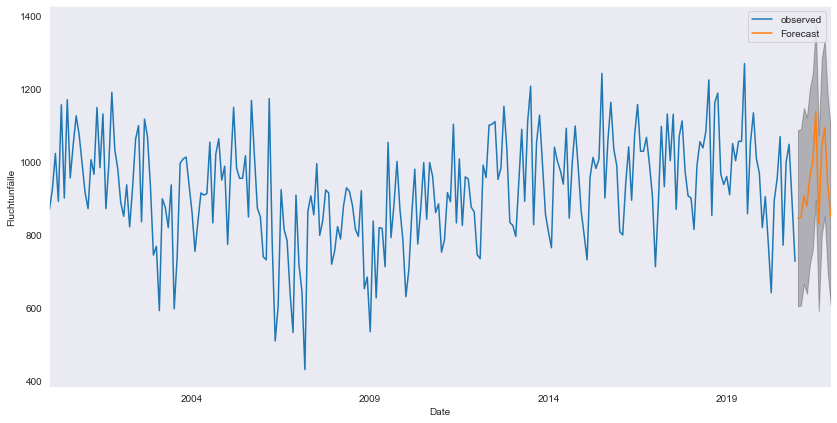

849.7676997930305
Prediction for Verkehrsunfälle


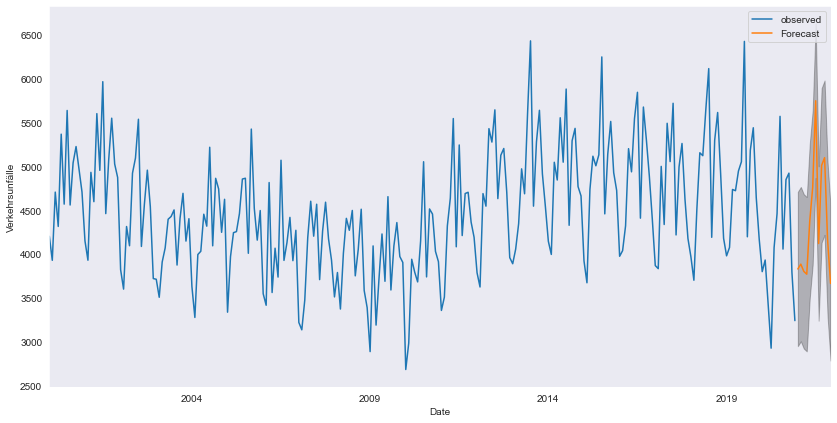

3666.367632619012


In [16]:
# Forcasting 

def forecast(model,year,months,y):
    predict_steps = (year - 2021) * 12 + months
    pred_uc = model.get_forecast(steps=predict_steps)
    if (months == 1):
        return pred_uc.predicted_mean[-1]
    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    plt.legend()
    plt.show()
    return pred_uc.predicted_mean[-1]

for i,cat in enumerate(MONATSZAHL):
    print("Prediction for " + cat)
    print(forecast(models[i], 2021, 12, dataset[cat]))

